# Chương trình truy vấn ảnh cơ bản

In [1]:
!unzip -q data.zip

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
#Take class from picture dataset
ROOT = 'data'
CLASS_NAME = sorted(list(os.listdir(f'{ROOT}/train')))

In [4]:
#resize image to common size and convert to numpy

def read_image_from_path(path, size):
  im = Image.open(path).convert('RGB').resize(size)
  return np.array(im)

def folder_to_image(folder, size):
  list_dir = [folder + '/' + name for name in os.listdir(folder)]
  images_np = np.zeros(shape=(len(list_dir), *size, 3))
  images_path = []
  for i, path in enumerate(list_dir):
    images_np[i] = read_image_from_path(path, size)
    images_path.append(path)
  images_path = np.array(images_path)
  return images_np, images_path

## Truy vấn hình ảnh với độ đo L1

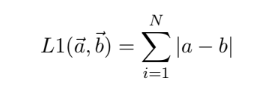

In [5]:
def absolute_difference(query, data):
  axis_batch_size = tuple(range(1, len(data.shape)))
  return np.sum(np.abs(data - query), axis = axis_batch_size)

In [6]:
#calculate similarity between input image and dataset image
def get_l1_score(root_img_path, query_path, size):
  query = read_image_from_path(query_path, size)
  ls_path_score = []
  for folder in os.listdir(root_img_path):
    if folder in CLASS_NAME:
      path = root_img_path + folder
      images_np, images_path = folder_to_image(path, size) #mang numpy chua nhieu anh, paths
      rates = absolute_difference(query, images_np)
      ls_path_score.extend(list(zip(images_path, rates)))
  return query, ls_path_score

In [7]:
def plot_results(query_path, ls_path_score, reverse=False):
    """
    Plots the results of the image similarity search.

    Args:
        query_path: Path to the query image.
        ls_path_score: A list of tuples containing (image_path, score).
        reverse: Whether to sort the results in descending order of score.
    """
    # Sort the results by score
    ls_path_score_sorted = sorted(ls_path_score, key=lambda x: x[1], reverse=reverse)

    # Display the query image
    query_img = plt.imread(query_path)
    plt.figure(figsize=(2, 2))
    plt.imshow(query_img)
    plt.title("Query Image")
    plt.show()

    # Display the top N most similar images
    N = 5  # Number of similar images to display
    fig, axes = plt.subplots(1, N, figsize=(20, 5))
    for i in range(N):
        img_path, score = ls_path_score_sorted[i]
        img = plt.imread(img_path)
        axes[i].imshow(img)
        axes[i].set_title(f"Score: {score:.2f}")
        axes[i].axis('off')
    plt.show()

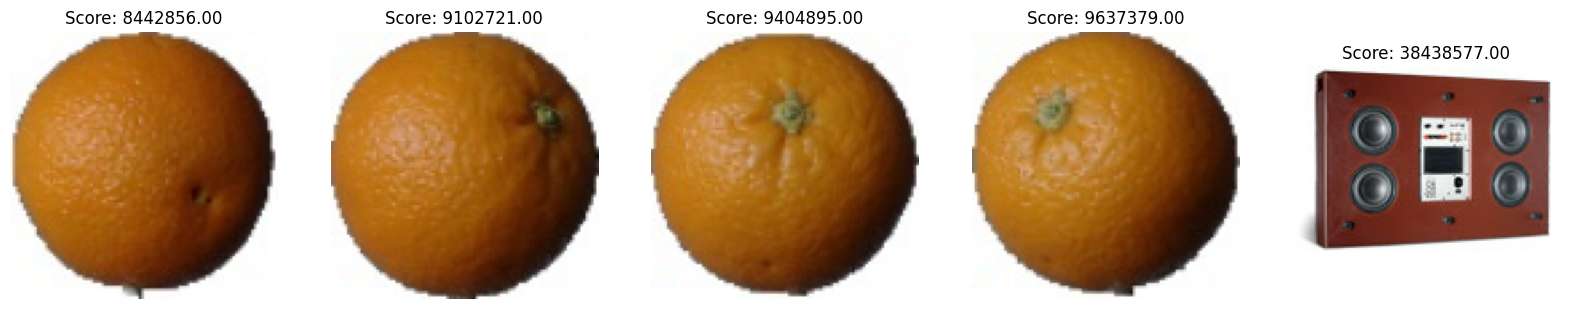

In [8]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

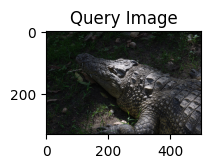

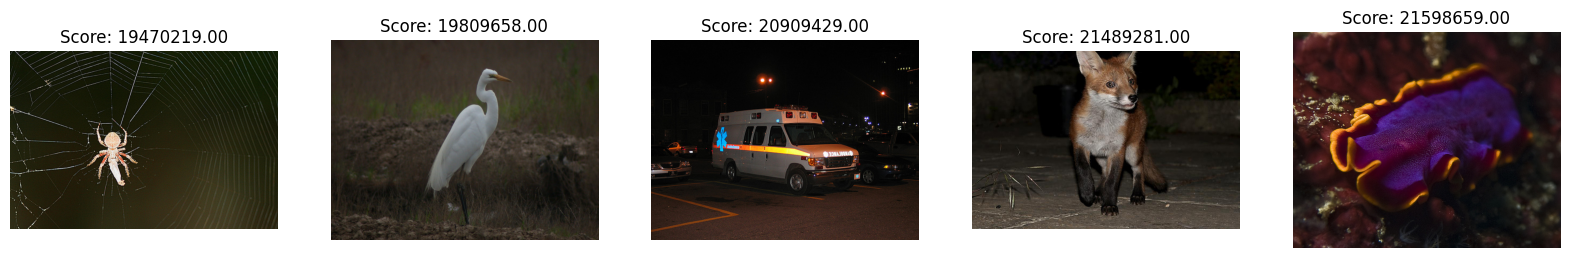

In [9]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

In [10]:
def mean_square_difference(query, data):
  axis_batch_size = tuple(range(1,len(data.shape)))
  return np.mean((data - query)**2, axis = axis_batch_size)

## Truy vấn hình ảnh với độ đo L2

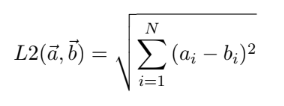

In [11]:
#create get_l2_score function
def get_l2_score(root_img_path, query_path, size):
  query = read_image_from_path(query_path, size)
  ls_path_score = []
  for folder in os.listdir(root_img_path):
    path = root_img_path + folder
    images_np, images_path = folder_to_image(path, size)
    rates = mean_square_difference(query, images_np)
    ls_path_score.extend(list(zip(images_path, rates)))
  return query, ls_path_score

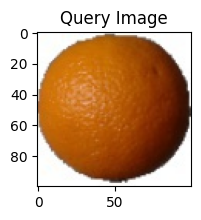

In [12]:
#test again
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

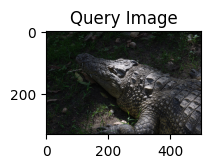

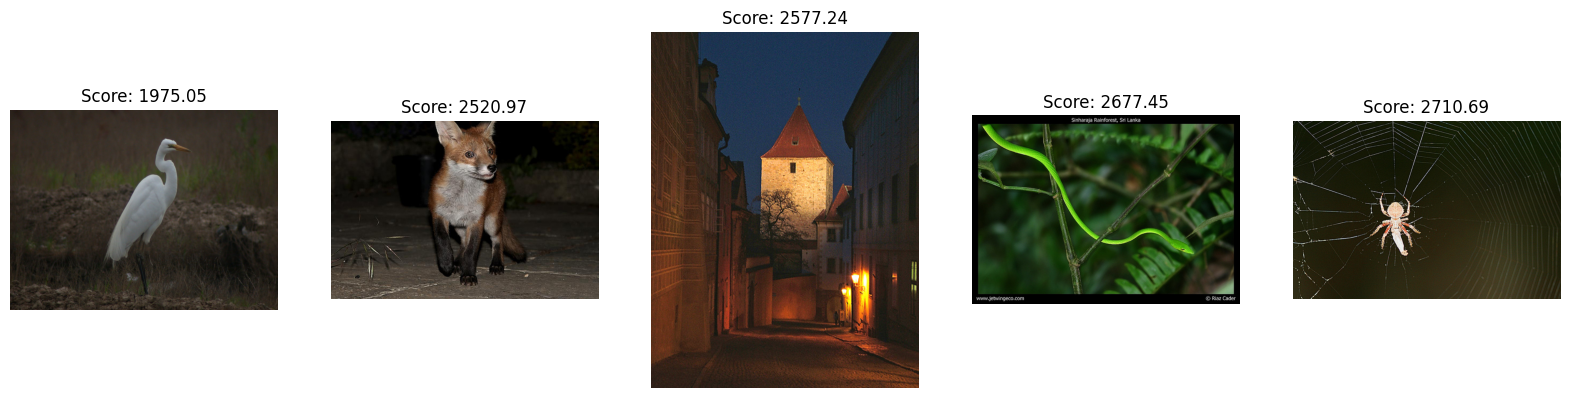

In [13]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

In [14]:
#calculate cosine similarity
def cosine_similarity(query, data):
  axis_batch_size = tuple(range(1,len(data.shape)))
  query_norm = np.sqrt(np.sum(query**2))
  data_norm = np.sqrt(np.sum(data**2, axis=axis_batch_size))
  return np.sum(query*data, axis=axis_batch_size)/(query_norm*data_norm + np.finfo(float).eps)

## Truy vấn hình ảnh với độ đo Cosine Similarity

Screenshot 2024-08-20 at 11.52.12 AM.png

In [18]:
def get_cosine_similarity_score(root_img_path, query_path, size):
  query = read_image_from_path(query_path, size)
  ls_path_score = []
  for folder in os.listdir(root_img_path):
    if folder in CLASS_NAME:
      path = root_img_path + folder
      images_np, images_path = folder_to_image(path, size)
      rates = cosine_similarity(query, images_np)
      ls_path_score.extend(list(zip(images_path, rates)))
  return query, ls_path_score

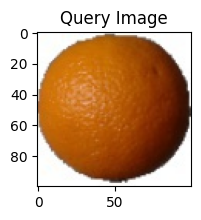

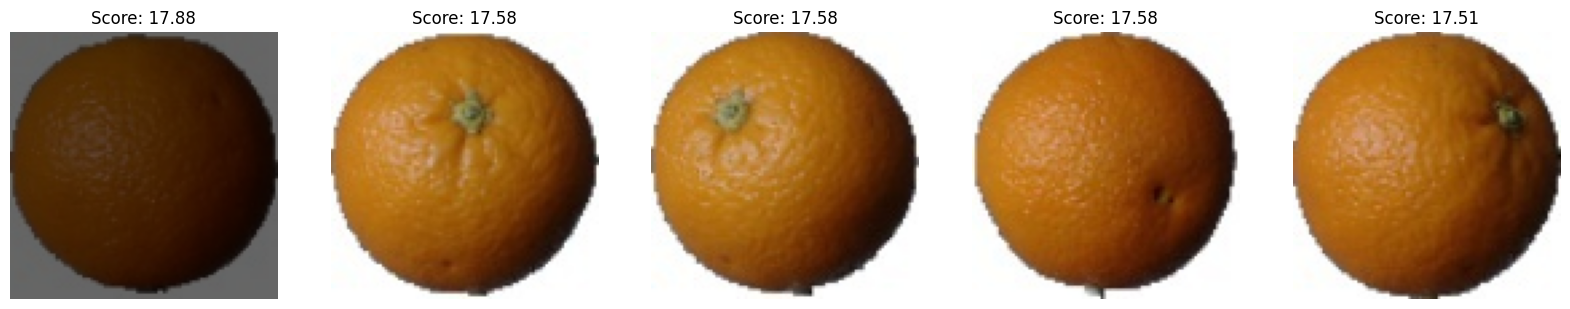

In [19]:
#test again
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

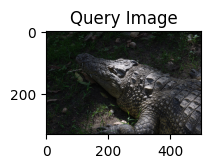

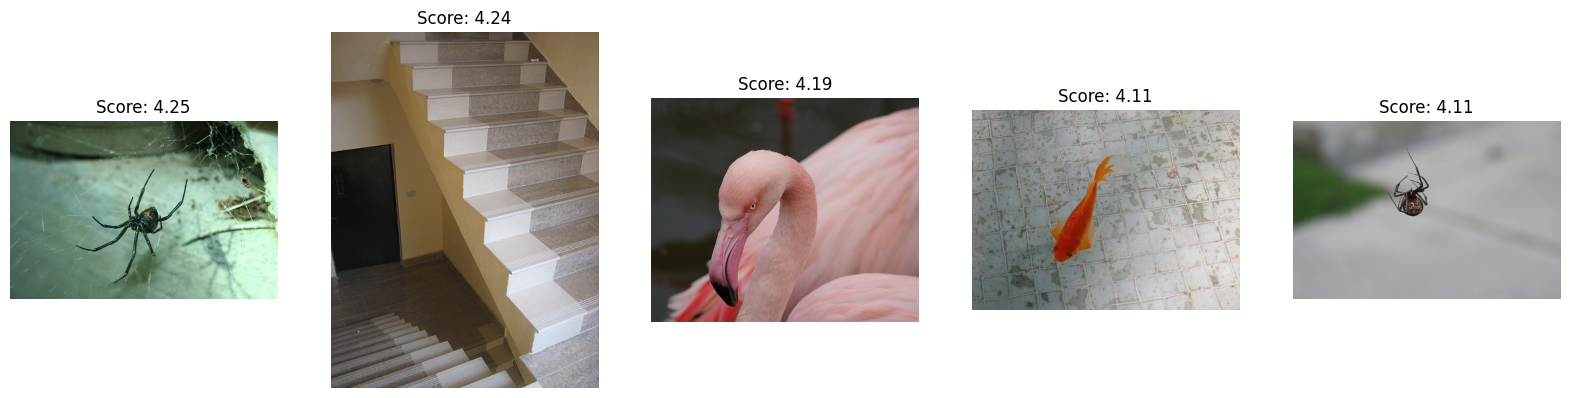

In [21]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

In [25]:
def correlation_coefficient(query, data):
  axis_batch_size = tuple(range(1, len(data.shape)))
  query_mean = query - np.mean(query)
  data_mean = data - np.mean(data, axis=axis_batch_size, keepdims=True)
  query_norm = np.sqrt(np.sum(query_mean**2))
  data_norm = np.sqrt(np.sum(data_mean**2, axis=axis_batch_size))
  return np.sum(query_mean * data_mean, axis=axis_batch_size) / (query_norm * data_norm + np.finfo(float).eps)

## Truy vấn hình ảnh với độ đo Correlation Coefficient

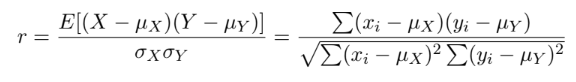

In [28]:
def get_correlation_coefficient(root_img_path, query_path, size):
  query = read_image_from_path(query_path, size)
  ls_path_score = []
  for folder in os.listdir(root_img_path):
    if folder in CLASS_NAME:
      path = root_img_path + folder
      images_np, images_path = folder_to_image(path, size)
      rates = correlation_coefficient(query, images_np)
      ls_path_score.extend(list(zip(images_path, rates)))
  return query, ls_path_score

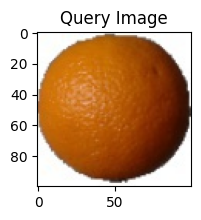

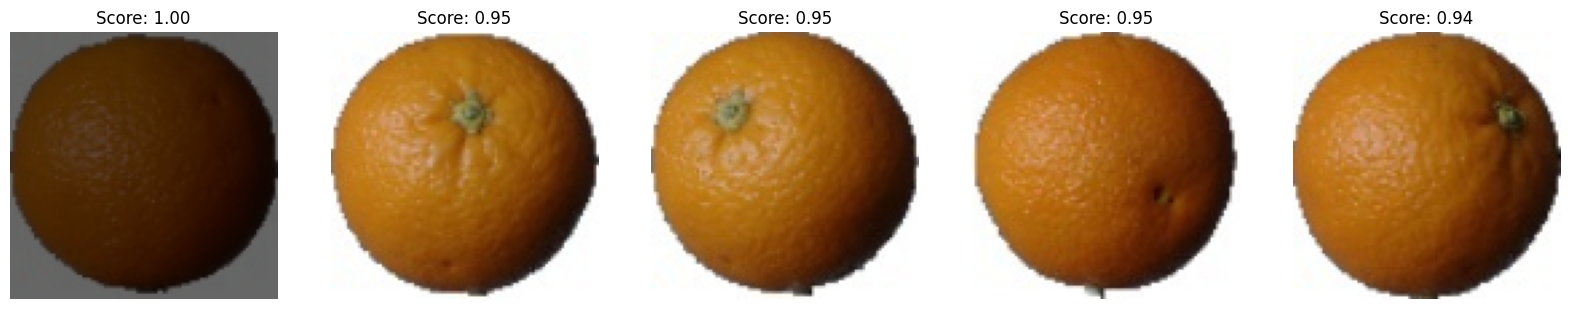

In [29]:
#test again
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

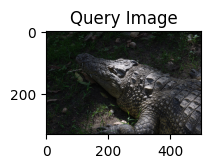

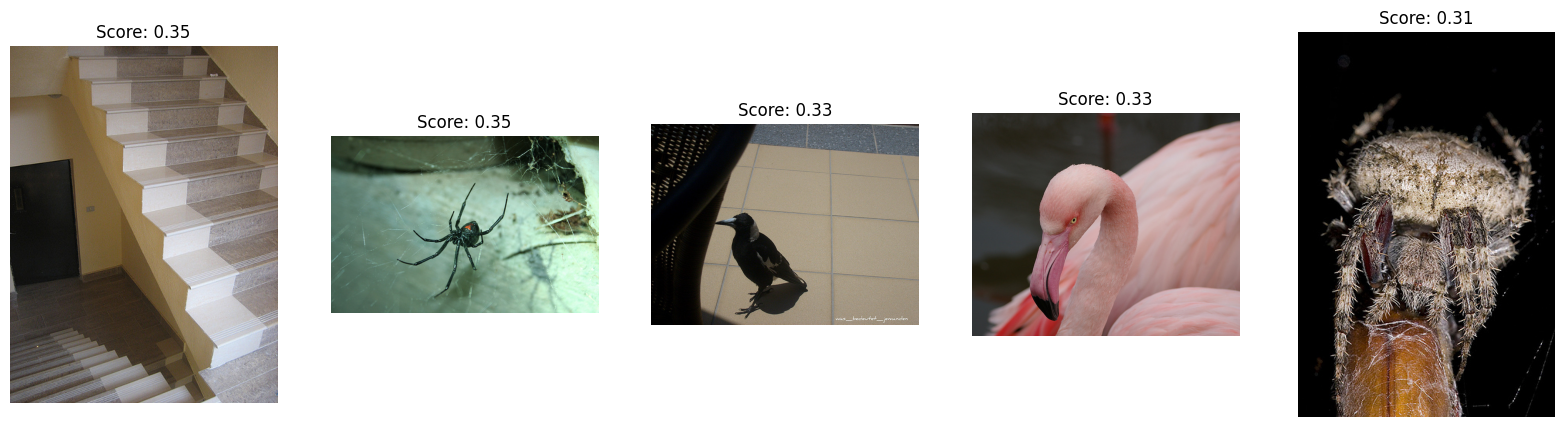

In [30]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

# Chương trình truy vấn ảnh nâng cao

Phần này nhằm phát triển các tính năng nâng cao cho hệ thống truy vấn ảnh, bằng cách sử dụng deep
learning model **trích xuất feature vector** cho các ảnh để tăng cường khả năng truy xuất hình ảnh chính
xác hơn.

Trong quá trình tìm kiếm ảnh, một hình ảnh truy vấn được đưa vào mô hình, mô hình sẽ tính toán đặc
trưng của hình ảnh truy vấn và so sánh chúng với các đặc trưng đã được tính toán trước của những
hình ảnh được lưu trữ trên hệ thống. Sự tương đồng giữa các đặc trưng này được sử dụng để xác định
các hình ảnh có liên quan nhất, và kết quả là những hình ảnh tương tự nhất với hình ảnh truy vấn được
trả về cho người dùng. Những mô hình này có khả năng phân tích và nhận diện các đặc tính phức tạp
của ảnh như kết cấu, hình dạng, và màu sắc, do đó chúng rất hiệu quả trong việc tìm kiếm và lấy lại
hình ảnh dựa trên nội dung.

## Truy vấn với pretrained deep learning model

Để bắt đầu quá trình truy vấn hình ảnh sử dụng pretrained deep learning model, trước tiên, chúng ta
cần cài đặt hai thư viện quan trọng là chromadb và open-clip-torch. Thư viện **chromadb hỗ trợ việc
quản lý và truy xuất dữ liệu hình ảnh hiệu quả** (chúng ta cũng sử dụng thêm với mục đích tạo vector
database), và chromadb có thể dùng open-clip-torch để cung cấp khả năng **sử dụng mô hình CLIP đã
được đào tạo sẵn**, đây là một công cụ mạnh mẽ để phân tích nội dung hình ảnh thông qua học sâu.

In [ ]:
!pip install chromadb
!pip install open-clip-torch

In [32]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction

Quy trình tương tự so với các bước ở phần trước, nhưng chúng ta sẽ nâng cấp bằng cách thêm một hàm để trích xuất vector
đặc trưng cho mỗi hình ảnh. Mô hình CLIP sẽ được sử dụng để biến đổi hình ảnh thành các vector đặc
trưng đại diện cho nội dung và ngữ cảnh của hình ảnh đó. Sau đó, việc so sánh các hình ảnh không
được thực hiện trực tiếp trên ảnh gốc mà là thông qua việc tính sự tương đồng giữa các vector này.

In [33]:
embedding_function = OpenCLIPEmbeddingFunction()

def get_single_image_embedding(image):
  embedding = embedding_function._encode_image(image=image)
  return np.array(embedding)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Truy vấn embedding với độ đo L1, sử dụng CLIP model để trích xuất vector đặc trưng

In [36]:
def get_l1_score(root_img_path, query_path, size):
  query = read_image_from_path(query_path, size)
  query_embedding = get_single_image_embedding(query)
  ls_path_score = []
  for folder in os.listdir(root_img_path):
    if folder in CLASS_NAME:
      path = root_img_path + folder
      images_np, images_path = folder_to_image(path, size)
      embedding_list = []
      for idx_img in range(images_np.shape[0]):
        embedding = get_single_image_embedding(images_np[idx_img].astype(np.uint8))
        embedding_list.append(embedding)
      rates = absolute_difference(query_embedding, np.stack(embedding_list))
      ls_path_score.extend(list(zip(images_path, rates)))
  return query, ls_path_score

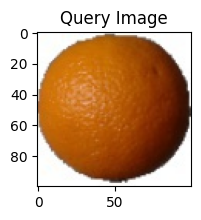

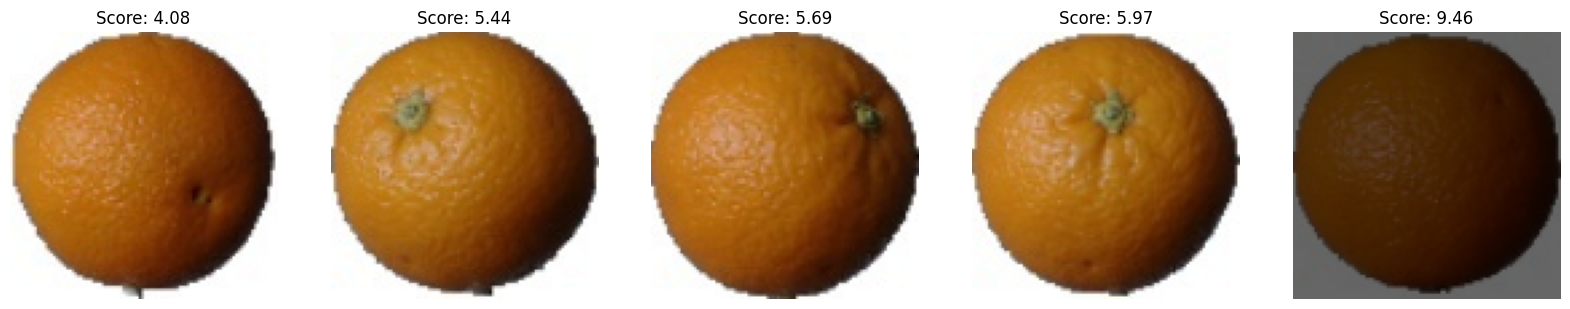

In [37]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

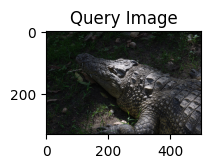

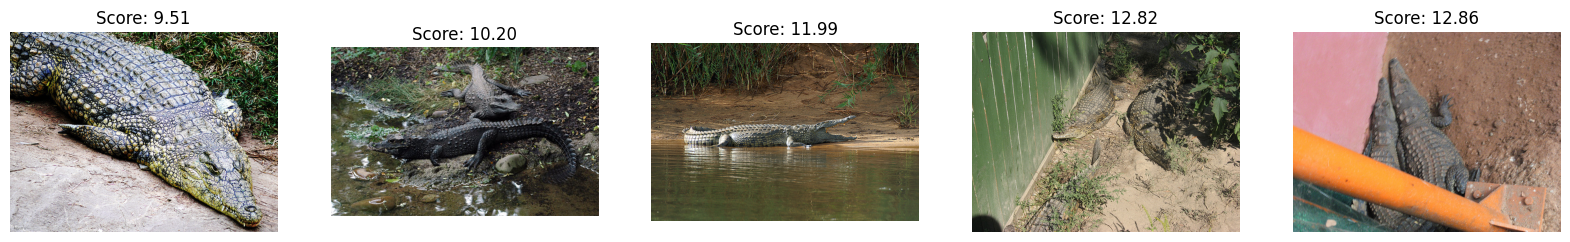

In [42]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

Truy vấn embedding vector với độ đo L2

In [43]:
def get_l2_score(root_img_path, query_path, size):
  query = read_image_from_path(query_path, size)
  query_embedding = get_single_image_embedding(query)
  ls_path_score = []
  for folder in os.listdir(root_img_path):
    if folder in CLASS_NAME:
      path = root_img_path + folder
      images_np, images_path = folder_to_image(path, size)
      embedding_list = []
      for idx_img in range(images_np.shape[0]):
        embedding = get_single_image_embedding(images_np[idx_img].astype(np.uint8))
        embedding_list.append(embedding)
      rates = mean_square_difference(query_embedding, np.stack(embedding_list))
      ls_path_score.extend(list(zip(images_path, rates)))
  return query, ls_path_score

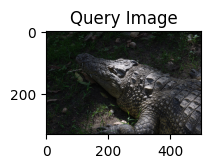

In [44]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

Truy vấn embedding vector với cosine similarity

In [45]:
def get_cosine_similarity_score(root_img_path, query_path, size):
  query = read_image_from_path(query_path, size)
  query_embedding = get_single_image_embedding(query)
  ls_path_score = []
  for folder in os.listdir(root_img_path):
    if folder in CLASS_NAME:
      path = root_img_path + folder
      images_np, images_path = folder_to_image(path, size)
      embedding_list = []
      for idx_img in range(images_np.shape[0]):
        embedding = get_single_image_embedding(images_np[idx_img].astype(np.uint8))
        embedding_list.append(embedding)
      rates = cosine_similarity(query_embedding, np.stack(embedding_list))
      ls_path_score.extend(list(zip(images_path, rates)))
  return query, ls_path_score

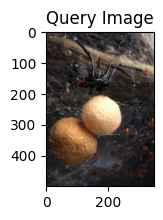

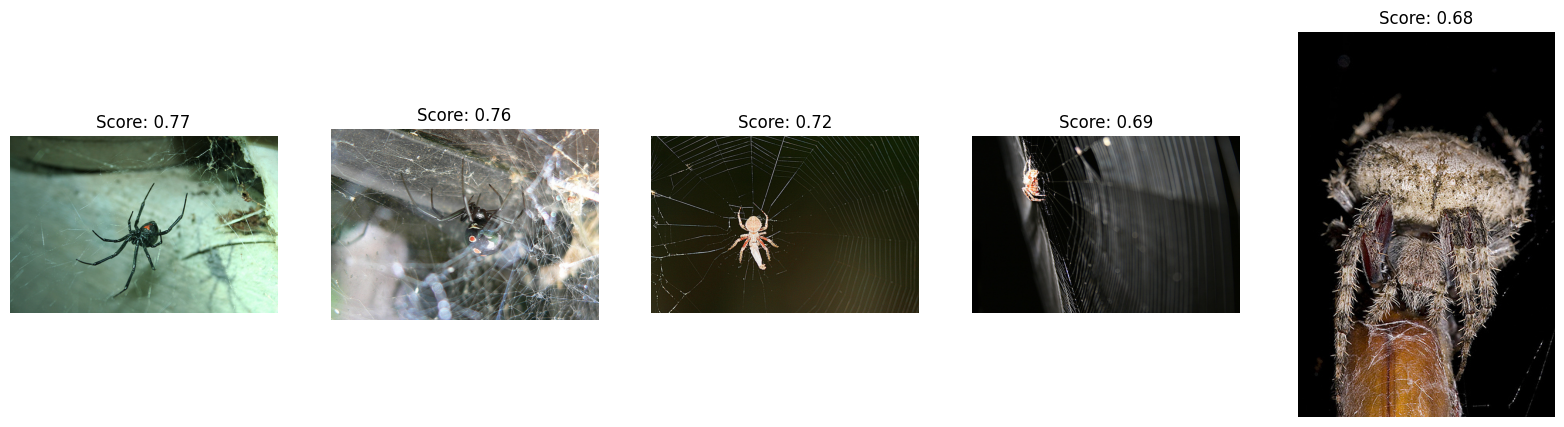

In [46]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/black_widow/n01774384_10073.JPEG"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

Truy vấn embedding vector với độ đo Correlation Coefficient

In [47]:
def get_correlation_coefficient(root_img_path, query_path, size):
  query = read_image_from_path(query_path, size)
  query_embedding = get_single_image_embedding(query)
  ls_path_score = []
  for folder in os.listdir(root_img_path):
    if folder in CLASS_NAME:
      path = root_img_path + folder
      images_np, images_path = folder_to_image(path, size)
      embedding_list = []
      for idx_img in range(images_np.shape[0]):
        embedding = get_single_image_embedding(images_np[idx_img].astype(np.uint8))
        embedding_list.append(embedding)
      rates = correlation_coefficient(query_embedding, np.stack(embedding_list))
      ls_path_score.extend(list(zip(images_path, rates)))
  return query, ls_path_score

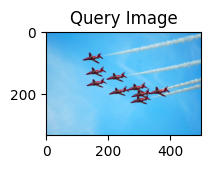

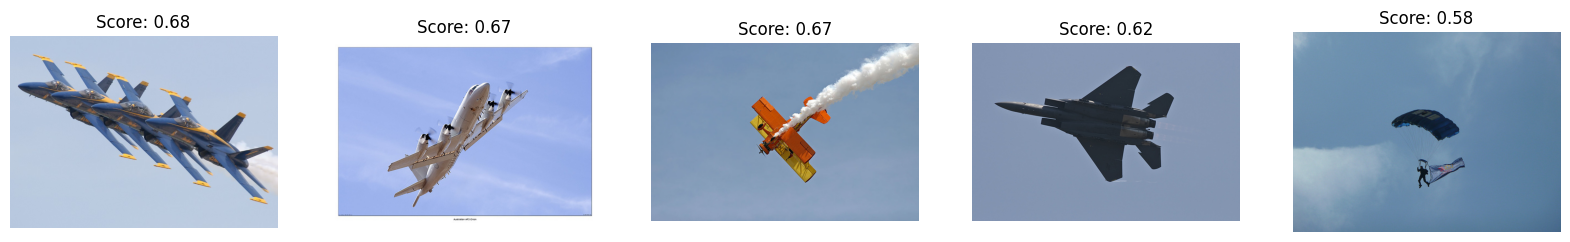

In [49]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/warplane/n04552348_15743.JPEG"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

## Tối ưu hóa quy trình truy vấn hình ảnh sử dụng mô hình clip và cơ sở dữ liệu vector

In [50]:
#lấy đường dẫn của các ảnh muốn trích xuất vector
def get_file_path(path):
  file_path = []
  for label in CLASS_NAME:
    label_path = path + "/" + label
    filenames = os.listdir(label_path)
    for filename in filenames:
      filepath = label_path + "/" + filename
      file_path.append(filepath)
  return file_path

data_path = f"{ROOT}/train"
files_path = get_file_path(path = data_path)

**Truy vấn ảnh với L2 Collection**

Trong ChromaDB, "collection" là một khái niệm quan trọng, dùng
để tổ chức và quản lý dữ liệu. Một collection trong ChromaDB có thể được hiểu như là một tập hợp các
vector hoặc tài liệu được chỉ mục và lưu trữ cùng nhau dựa trên một số tiêu chí hoặc đặc điểm chung.
Nó tương tự như concept của "table" trong cơ sở dữ liệu quan hệ hoặc "collection" trong MongoDB.
Đoạn code sau đây định nghĩa hàm add_embedding, một hàm giúp trích xuất và lưu trữ các vector
đặc trưng của ảnh vào một collection đã được tạo.

In [60]:
def get_single_image_embedding(image):
  embedding = embedding_function._encode_image(image=np.array(image))
  return embedding

Tạo embedding collection từ các đường dẫn file ảnh data ở bước trên

In [61]:
from tqdm import tqdm

def add_embedding(collection, file_path):
  ids = []
  embeddings = []
  for id_filepath, filepath in tqdm(enumerate(file_path)):
    ids.append(f'id_{id_filepath}')
    image = Image.open(filepath)
    embedding = get_single_image_embedding(image = image)
    embeddings.append(embedding)
  collection.add(
      embeddings=embeddings,
      ids=ids
  )



Tiếp theo chúng ta khởi tạo một client cho cơ sở dữ liệu Chroma và tạo một collection mới với cấu hình
sử dụng L2 để so sánh các embedding vector. Sau đó, gọi hàm add_embedding để thêm các vector đặc
trưng của ảnh vào collection này, qua đó tạo điều kiện thuận lợi cho việc truy vấn nhanh chóng và hiệu
quả.

In [ ]:
import chromadb
HNSW_SPACE = "hnsw:space"

#Create a Chroma Client
chroma_client = chromadb.Client()

#Create a collection
l2_collection = chroma_client.get_or_create_collection(name = 'l2_collection',
                                                       metadata = {HNSW_SPACE: "l2"})
add_embedding(collection=l2_collection, file_path=files_path)

In [64]:
def search(image_path, collection, n_results):
    query_image = Image.open(image_path)
    query_embedding = get_single_image_embedding(query_image)
    results = collection.query(
        query_embeddings=[query_embedding],
        n_results=n_results # how many results to return
    )
    return results

In [ ]:
test_path = f'{ROOT}/test'
test_files_path = get_file_path(path=test_path)
test_path = test_files_path[1]
l2_results = search(image_path=test_path, collection=l2_collection, n_results=5)